# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

Comparing the distribution plot of the temperature points with the normal curve.

C:\Users\Sailen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


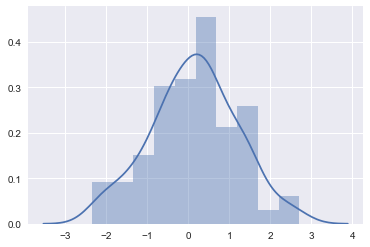

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

normal_dist = np.random.normal(size=130)
sns.distplot(normal_dist)

C:\Users\Sailen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


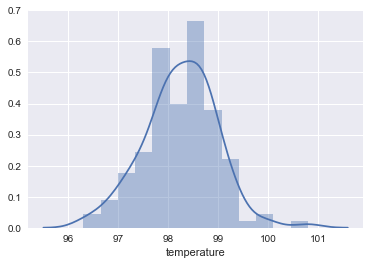

In [5]:
temp_dist = df['temperature'].sort_values()
sns.distplot(temp_dist)

### The temperature curve looks like the normal curve. 

## 2. Is the sample size large? Are the observations independent?

In [5]:
num_obs=len(df['temperature'])
print(num_obs)

130


## 3. Is the true population mean really 98.6 degrees F?

In [6]:
sample_mean = temp_dist.mean()
sample_std = temp_dist.std()
print(sample_mean)
print(sample_std)

98.24923076923076
0.7331831580389453


H0 : Null Hypothesis: Body temperature is 98.6 deg.
H1 : Alternate Hypothesis: Body temperature is not 98.6 deg.

 Now, let's build a 95% confidence interval around our population mean. Assuming that the population is normally distributed, we can look-up on the two-tailed Z-table for a 95% interval (47.5 for positive side): The corresponding Z-score for a 95% confidence interval is 1.96.

### The 95% interval around our mean will be 1.96 standard deviations on either side of the mean.

In [9]:
z_score = 1.96
conf_interval = (sample_mean - z_score*sample_std, sample_mean + z_score*sample_std)
print('Confidence Interval: {}'.format(conf_interval))

Confidence Interval: (96.81219177947443, 99.6862697589871)


H0: The population mean is indeed 98.6 degree Fahrenheit

H1: The population mean is NOT 98.6 degree Fahrenheit
We will now check if 98.2 degree F is within a 95% confidence interval of our assumed population mean of 98.6. If this is the case, then will reject the null hypothesis. First, we need to determine the standard deviation of the population. We can estimate this using the variance of the sampling distribution as follows:

In [8]:
import math
pop_mean = 98.6
pop_std = math.sqrt((sample_std**2)/len(temp_dist))
print('Population Mean: {}, Population STD: {}'.format(pop_mean, pop_std))

Population Mean: 98.6, Population STD: 0.064304416837891


Now, let's build a 95% confidence interval around our population mean. Assuming that the population is normally distributed, we can look-up on the two-tailed Z-table for a 95% interval (47.5 for positive side): The corresponding Z-score for a 95% confidence interval is 1.96.

#### The 95% interval around our mean will be 1.96 standard deviations on either side of the mean.

In [9]:
z_score = 1.96
conf_interval = (pop_mean - z_score*pop_std, pop_mean + z_score*pop_std)
print('Confidence Interval: {}'.format(conf_interval)) 

Confidence Interval: (98.47396334299773, 98.72603665700225)


Our sample mean of 98.2 lies well beyond the confidence interval. Therefore we REJECT the Null hypothesis. The population mean is NOT 98.6 degree fahrenheit.

#### Conclusion Z-test: H0 Rejected. Population Mean is NOT 98.6 degree Fahrenheit

## What if we used a T-Test instead of a Z-Test
Let's build a similar 95% confidence interval using the T-Table. We will assume 120 degrees of freedom. The T-score from the T-table for a 95% two-sided confidence interval is 1.980.

In [10]:
t_score = 1.98
conf_interval = (pop_mean - t_score*pop_std, pop_mean + t_score*pop_std)
print('Confidence Interval: {}'.format(conf_interval)) 

Confidence Interval: (98.47267725466097, 98.72732274533902)


Our confidence interval has marginally expanded as a result of the T-Test. However, our sample mean of 98.2 still lies well beyond the confidence interval. Therefore we reject the Null hypothesis. The population mean is NOT 98.6 degree fahrenheit.

Conclusion T-test: H0 Rejected. Population Mean is NOT 98.6 degree Fahrenheit.